<a href="https://colab.research.google.com/github/The-Jasper-Foundation/JRRoyaltech/blob/main/ARX_Problem_2_Smart_Radio_Mesh_Management_with_UGVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARX Robotics: Day 1 & Day 2 – Smart Radio Mesh Management with UGVs
Goal: Use graph algorithms to improve a mesh network of ground vehicles (UGVs) for better range, robustness, and self-healing.

Network Description:

Each UGV is a node in the graph
Links (edges) between them have weights (e.g., signal strength or bandwidth)
If a UGV drops out, the network should adapt

Day 1: Build a Simulation of the Mesh

We'll:

Create a network of UGVs as a weighted graph
Simulate nodes joining/leaving
Use algorithms to find optimal paths (e.g., Dijkstra)
Visualize the mesh

In [1]:
# Install required libraries
!pip install networkx matplotlib

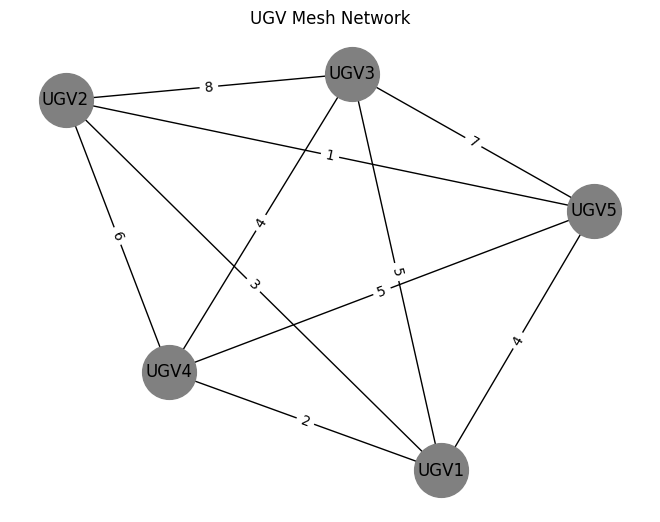

In [2]:
# Step 1: Create and Visualize the Mesh
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a random mesh of UGVs
G = nx.Graph()

UGVs = ['UGV1', 'UGV2', 'UGV3', 'UGV4', 'UGV5']
for i in range(len(UGVs)):
    for j in range(i+1, len(UGVs)):
        weight = random.randint(1, 10)  # Simulated signal strength
        G.add_edge(UGVs[i], UGVs[j], weight=weight)

pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='grey', node_size=1500)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("UGV Mesh Network")
plt.show()

In [3]:
# Step 2: Identify Important Nodes
centrality = nx.betweenness_centrality(G, weight='weight')
sorted_nodes = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
print("Top relay candidates:")
for node, score in sorted_nodes:
    print(f"{node}: {score:.3f}")

Top relay candidates:
UGV1: 0.222
UGV2: 0.083
UGV5: 0.056
UGV3: 0.000
UGV4: 0.000


In [4]:
# Step 3: Simulate Node Failure and Reconnect
G.remove_node('UGV3')  # simulate failure
print("UGV3 removed. Is network still connected?:", nx.is_connected(G))

# Re-add a new node to heal network
G.add_node('UGV6')
G.add_edge('UGV6', 'UGV1', weight=5)
G.add_edge('UGV6', 'UGV2', weight=4)
print("UGV6 added to reconnect. Is network connected now?:", nx.is_connected(G))

UGV3 removed. Is network still connected?: True
UGV6 added to reconnect. Is network connected now?: True


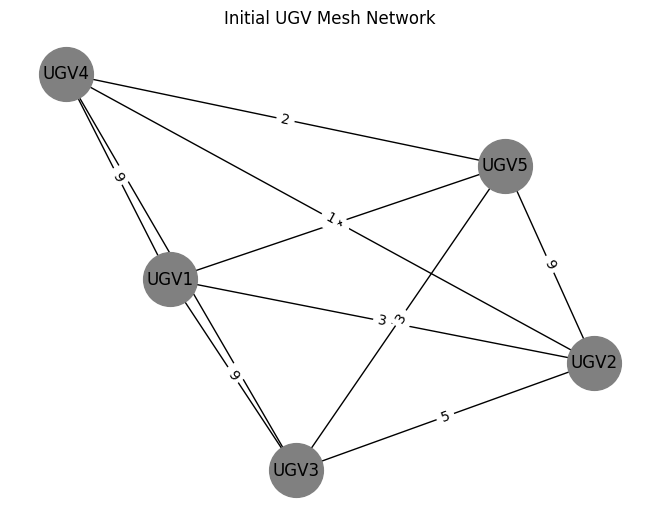

UGV3 disconnected at CP1. Is network connected?: True

-- Passing CP2 --
UGV3 reconnected to UGV1 with signal 2
UGV3 reconnected to UGV2 with signal 3
UGV3 reconnected to UGV4 with signal 3
UGV3 reconnected to UGV5 with signal 4
UGV3 successfully rejoined the mesh.


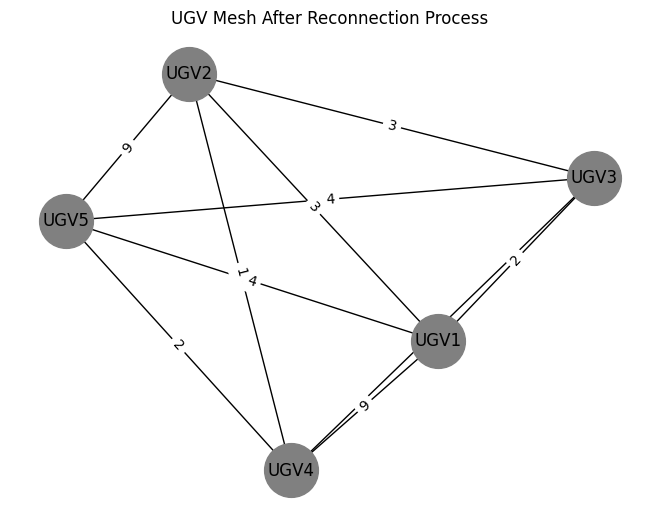

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# === Step 1: Initialize ===
UGVs = ['UGV1', 'UGV2', 'UGV3', 'UGV4', 'UGV5']
G = nx.Graph()

# Simulate mesh with signal strength as edge weights (1=best, 10=weak)
for i in range(len(UGVs)):
    for j in range(i+1, len(UGVs)):
        weight = random.randint(1, 10)
        G.add_edge(UGVs[i], UGVs[j], weight=weight)

# === Checkpoint logic simulation ===
checkpoints = ['CP1', 'CP2', 'CP3']
disconnected_node = 'UGV3'
reconnect_threshold = 5  # signal strength threshold to reconnect
min_required_connections = 2
starting_point = 'BaseStation'

def visualize(G, title=""):
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='grey', node_size=1500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

# Visualize initial
visualize(G, "Initial UGV Mesh Network")

# === Simulate disconnection at first checkpoint ===
G.remove_node(disconnected_node)
print(f"{disconnected_node} disconnected at {checkpoints[0]}. Is network connected?:", nx.is_connected(G))

# Placeholder for tracking connections over checkpoints
reconnected = False
for cp_index in range(1, len(checkpoints)):
    print(f"\n-- Passing {checkpoints[cp_index]} --")

    # Simulate disconnected node moving closer and trying to reconnect
    G.add_node(disconnected_node)
    connections = 0
    for node in G.nodes():
        if node == disconnected_node:
            continue
        signal = random.randint(1, 10)  # simulate signal strength
        if signal <= reconnect_threshold:
            G.add_edge(disconnected_node, node, weight=signal)
            connections += 1
            print(f"{disconnected_node} reconnected to {node} with signal {signal}")

    if connections >= min_required_connections:
        print(f"{disconnected_node} successfully rejoined the mesh.")
        reconnected = True
        break
    else:
        print(f"{disconnected_node} only found {connections} connection(s). Insufficient for stable mesh.")
        G.remove_node(disconnected_node)  # simulate still isolated

# === After 2 checkpoints ===
if not reconnected:
    print(f"\n{disconnected_node} still isolated after 2 checkpoints. Recalling to {starting_point}.")
    G.add_node(disconnected_node)
    # Try connecting to base station or minimum viable set
    possible_connections = [node for node in G.nodes() if node != disconnected_node]
    connected = 0
    for node in possible_connections:
        signal = random.randint(1, 10)
        if signal <= reconnect_threshold:
            G.add_edge(disconnected_node, node, weight=signal)
            connected += 1
            print(f"{disconnected_node} connected to {node} at base with signal {signal}")

    if connected >= min_required_connections:
        print(f"{disconnected_node} has stable connection at base. Continuing operations.")
    else:
        print(f"{disconnected_node} failed to establish reliable base connection. Full recall triggered.")

# === Final visualization ===
visualize(G, "UGV Mesh After Reconnection Process")


In [6]:
def simulate_failure(G, node_to_remove):
    print(f"\n[!] Simulating failure: {node_to_remove}")
    G.remove_node(node_to_remove)
    print("Is network still connected?", nx.is_connected(G))
    visualize(G, f"Mesh After {node_to_remove} Failure")



[!] Simulating failure: UGV3
Is network still connected? True


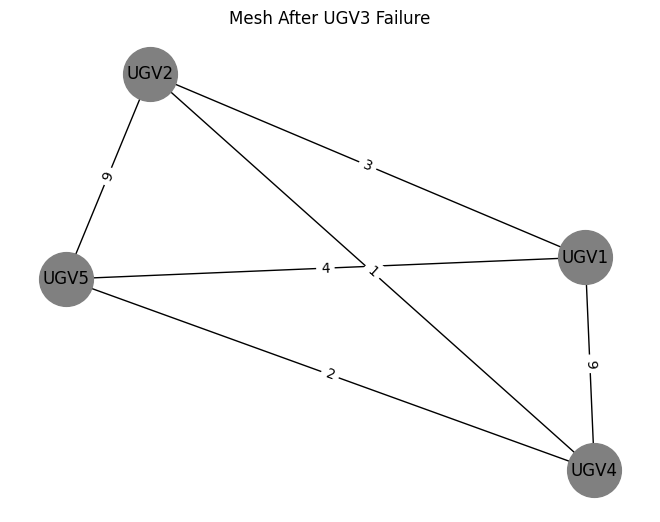

In [7]:
simulate_failure(G, 'UGV3')


In [8]:
def reconnect_UGV(G, ugv_id, base='UGV1', strength_threshold=5, required_links=2):
    print(f"\n[+] Attempting to reconnect {ugv_id}")
    G.add_node(ugv_id)
    connected = 0
    for node in G.nodes:
        if node == ugv_id:
            continue
        signal = random.randint(1, 10)
        if signal <= strength_threshold:
            G.add_edge(ugv_id, node, weight=signal)
            print(f"{ugv_id} reconnected to {node} with signal {signal}")
            connected += 1
    if connected >= required_links:
        print(f"[✓] {ugv_id} successfully rejoined the mesh.")
    else:
        print(f"[✗] {ugv_id} failed to reconnect. Returning to base {base}")
        # Retry reconnecting only to base
        signal = random.randint(1, 10)
        G.add_edge(ugv_id, base, weight=signal)
        print(f"{ugv_id} connected to base {base} with signal {signal}")
    visualize(G, f"{ugv_id} Reconnection Result")



[+] Attempting to reconnect UGV3
UGV3 reconnected to UGV1 with signal 1
UGV3 reconnected to UGV4 with signal 3
[✓] UGV3 successfully rejoined the mesh.


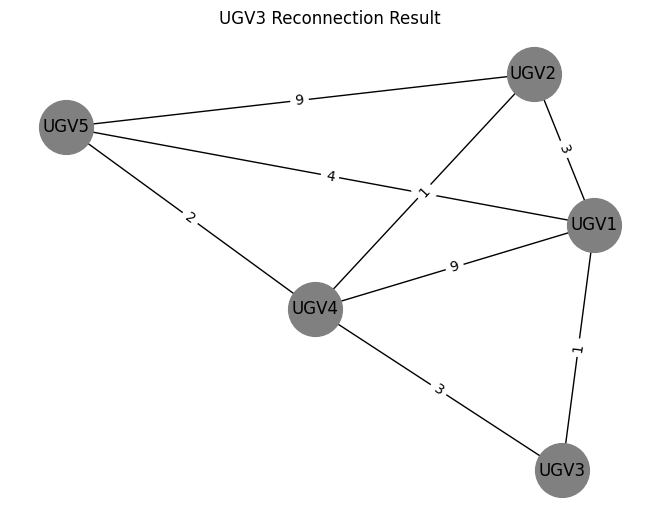

In [9]:
reconnect_UGV(G, 'UGV3')


In [10]:
# Safe height simulation
safe_height = {ugv: random.randint(10, 30) for ugv in G.nodes()}  # in meters
min_safe_height = 15

for ugv, height in safe_height.items():
    if height < min_safe_height:
        print(f"[WARNING] {ugv} flying too low at {height}m! Increase altitude.")


In [13]:
positions = {
    'UGV1': (0, 0),
    'UGV2': (2, 1),
    'UGV3': (4, 0),
    'UGV4': (1, 3),
    'UGV5': (3, 3)
}


In [15]:
G = nx.Graph()

# Add nodes
for ugv in positions:
    G.add_node(ugv, pos=positions[ugv])

# Add safe height check
safe_height = {ugv: random.randint(10, 30) for ugv in positions}
min_safe_height = 15
for ugv, height in safe_height.items():
    if height < min_safe_height:
        print(f"[WARNING] {ugv} flying too low at {height}m! Increase altitude.")

# Obstacle area
obstacles = [(2, 1.5, 1)]  # Format: (x, y, radius)

# Define obstacle check again for reuse
def is_in_obstacle(p1, p2, obstacles):
    for ox, oy, r in obstacles:
        mx, my = (p1[0]+p2[0])/2, (p1[1]+p2[1])/2
        if ((mx - ox)**2 + (my - oy)**2) < r**2:
            return True
    return False

# Create edges only if safe
for n1 in positions:
    for n2 in positions:
        if n1 != n2:
            if not is_in_obstacle(positions[n1], positions[n2], obstacles):
                dist = euclidean(positions[n1], positions[n2])
                weight = round(1 / (dist + 0.1), 2)
                G.add_edge(n1, n2, weight=weight)


[WARNING] UGV1 flying too low at 11m! Increase altitude.


In [17]:
def visualize(G, title="UGV Mesh Network"):
    pos = nx.get_node_attributes(G, 'pos')
    labels = nx.get_edge_attributes(G, 'weight')

    # Draw base mesh
    nx.draw(G, pos, with_labels=True, node_color='grey', node_size=1500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Draw obstacles
    for ox, oy, r in obstacles:
        circle = plt.Circle((ox, oy), r, color='red', alpha=0.3)
        plt.gca().add_patch(circle)

    plt.title(title)
    plt.axis('equal')
    plt.show()


In [19]:
from ipywidgets import interact

def drop_and_test(node):
    simulate_failure(G.copy(), node)

interact(drop_and_test, node=list(G.nodes))


interactive(children=(Dropdown(description='node', options=('UGV1', 'UGV2', 'UGV3', 'UGV4', 'UGV5'), value='UG…

<function __main__.drop_and_test(node)>

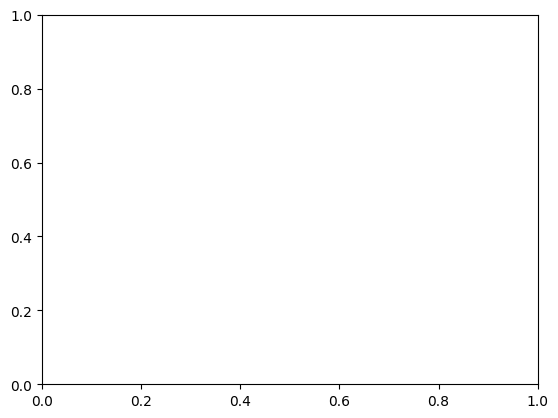

In [21]:
for ox, oy, r in obstacles:
    circle = plt.Circle((ox, oy), r, color='red', alpha=0.3)
    plt.gca().add_patch(circle)


In [22]:
def move_toward(p1, p2, step_size=0.2):
    dx, dy = p2[0] - p1[0], p2[1] - p1[1]
    dist = math.hypot(dx, dy)
    if dist == 0:
        return p1
    return (p1[0] + step_size * dx / dist, p1[1] + step_size * dy / dist)


In [23]:
import time

def animated_reconnect(G, moving_node='UGV3', target_node='UGV1', max_steps=20, threshold=0.4):
    # Get original positions
    start_pos = positions[moving_node]
    target_pos = positions[target_node]

    for step in range(max_steps):
        # Move toward target
        new_pos = move_toward(start_pos, target_pos)
        positions[moving_node] = new_pos
        G.nodes[moving_node]['pos'] = new_pos

        # Check obstacle
        if is_in_obstacle(new_pos, target_pos, obstacles):
            print(f"Step {step}: BLOCKED by obstacle! Re-routing or abort.")
            break

        # Calculate signal strength
        dist = euclidean(new_pos, target_pos)
        strength = round(1 / (dist + 0.1), 2)

        # Visualize
        visualize(G, f"Step {step} - Pos {new_pos}, Signal {strength}")
        time.sleep(0.5)

        # Attempt reconnection
        if strength >= threshold:
            G.add_edge(moving_node, target_node, weight=strength)
            print(f"[✓] Reconnected at step {step} with signal {strength}")
            visualize(G, f"UGV3 Reconnected at Step {step}")
            return

        start_pos = new_pos

    print("[✗] Failed to reconnect within allowed steps.")


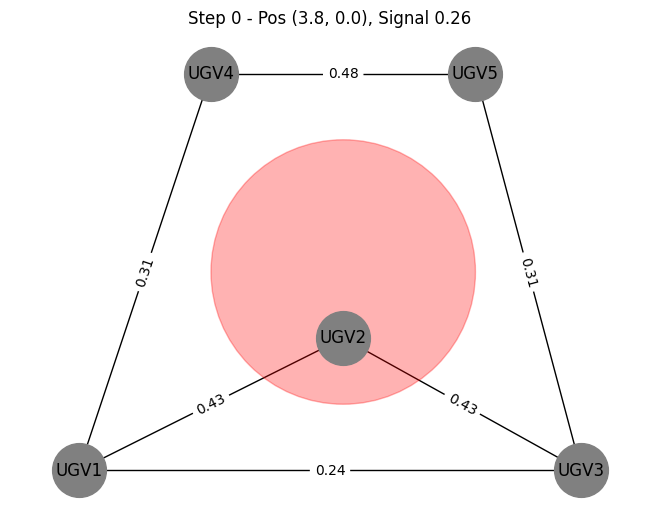

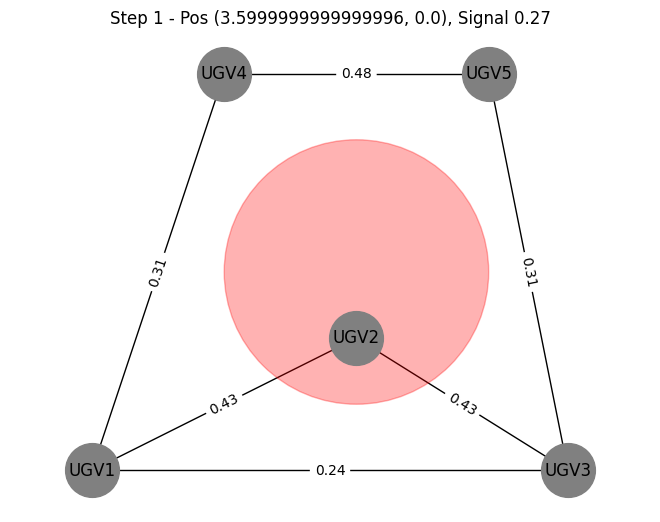

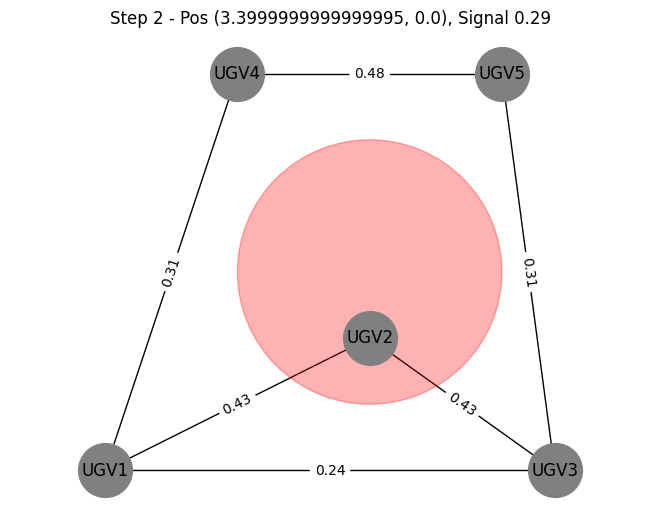

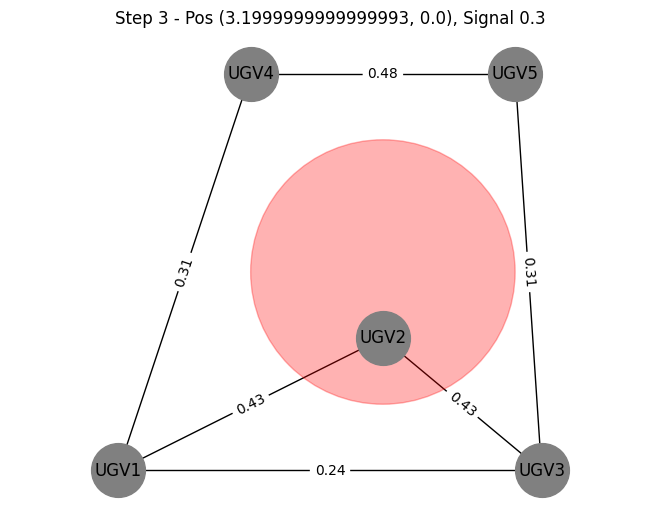

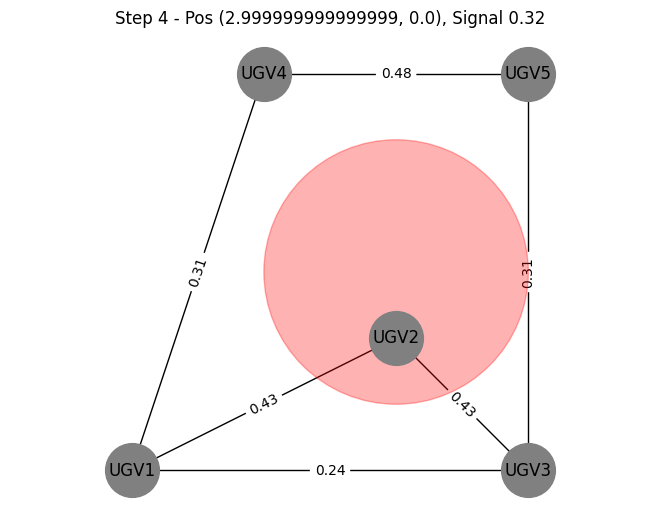

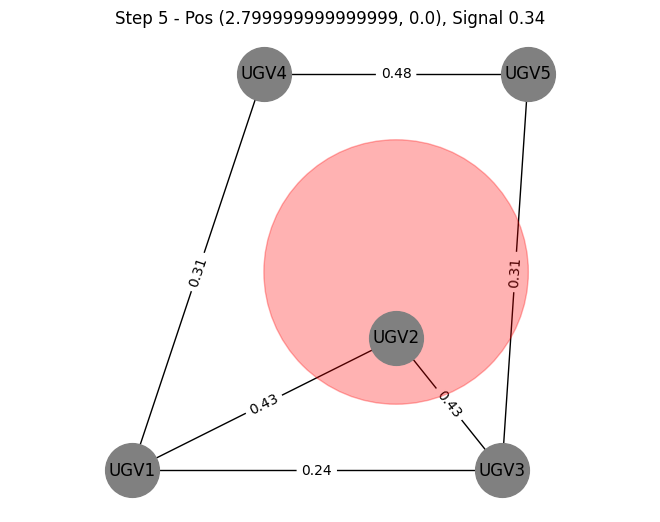

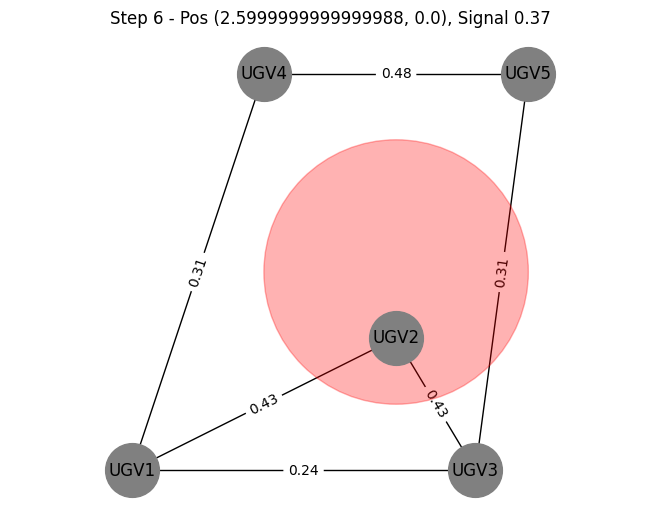

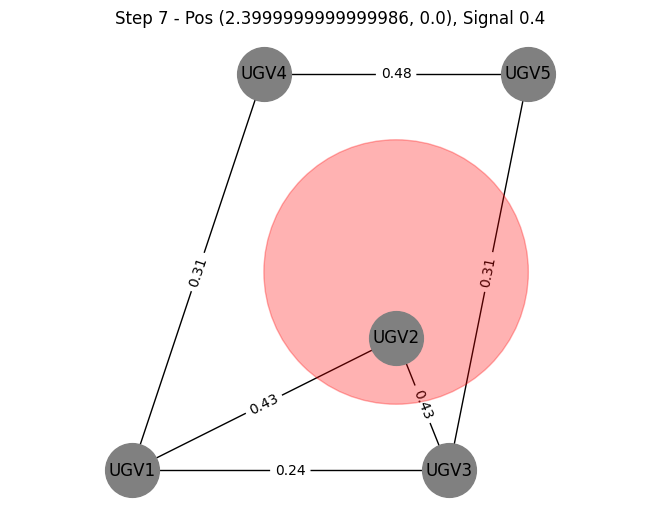

[✓] Reconnected at step 7 with signal 0.4


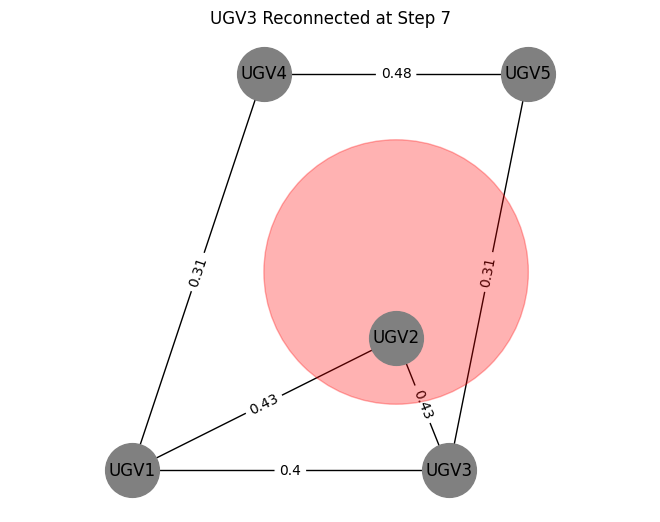

In [24]:
animated_reconnect(G, moving_node='UGV3', target_node='UGV1')


In [25]:
def move_all_ugvs(positions, goals, step_size=0.5):
    for ugv in positions:
        current = positions[ugv]
        goal = goals[ugv]
        new_pos = move_toward(current, goal, step_size)
        positions[ugv] = new_pos


In [26]:
def rebuild_mesh(G, positions, signal_threshold=0.4):
    G.clear_edges()
    nodes = list(positions.keys())
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            n1, n2 = nodes[i], nodes[j]
            if is_in_obstacle(positions[n1], positions[n2], obstacles):
                continue
            dist = euclidean(positions[n1], positions[n2])
            strength = round(1 / (dist + 0.1), 2)
            if strength >= signal_threshold:
                G.add_edge(n1, n2, weight=strength)


In [27]:
def simulate_battlefield(G, positions, goals, steps=20):
    for step in range(steps):
        move_all_ugvs(positions, goals)
        for ugv in G.nodes:
            G.nodes[ugv]['pos'] = positions[ugv]
        rebuild_mesh(G, positions)
        visualize(G, f"Battlefield Step {step}")
        time.sleep(0.5)


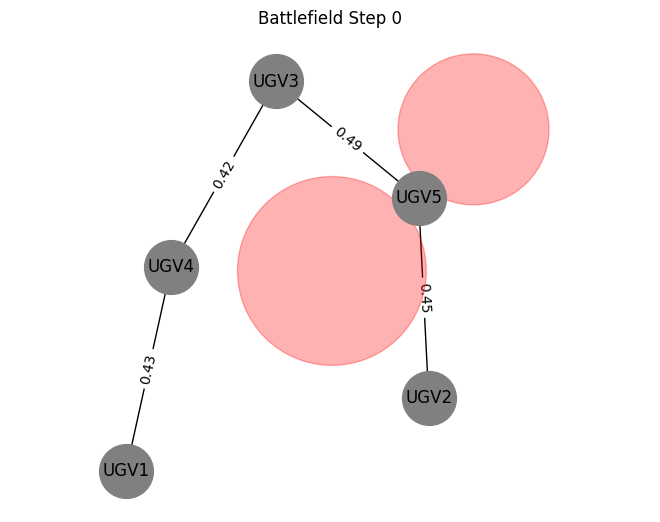

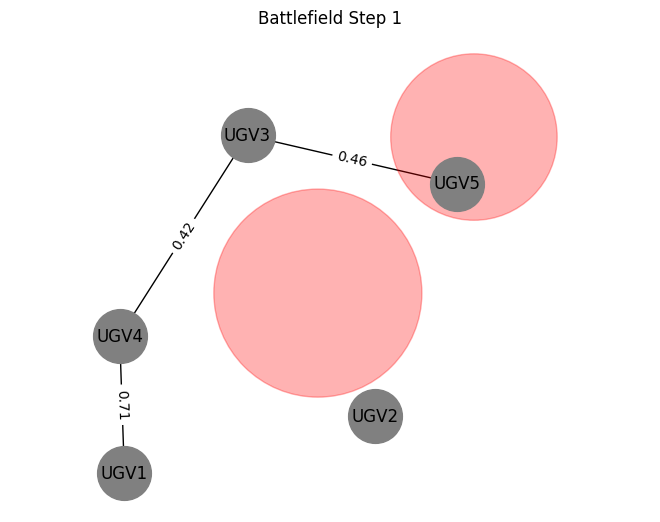

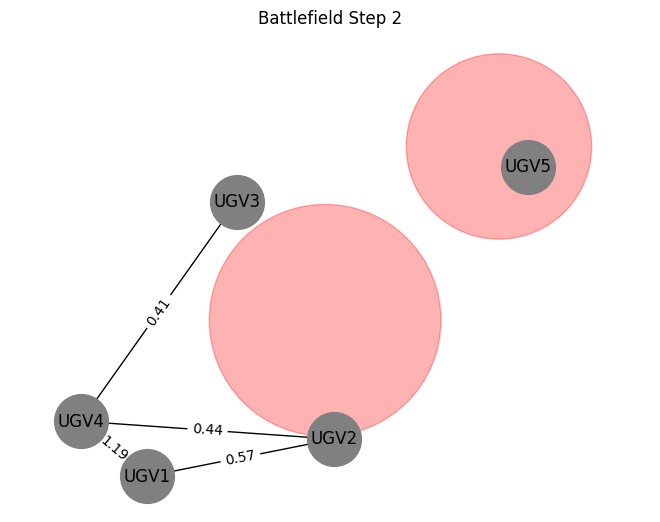

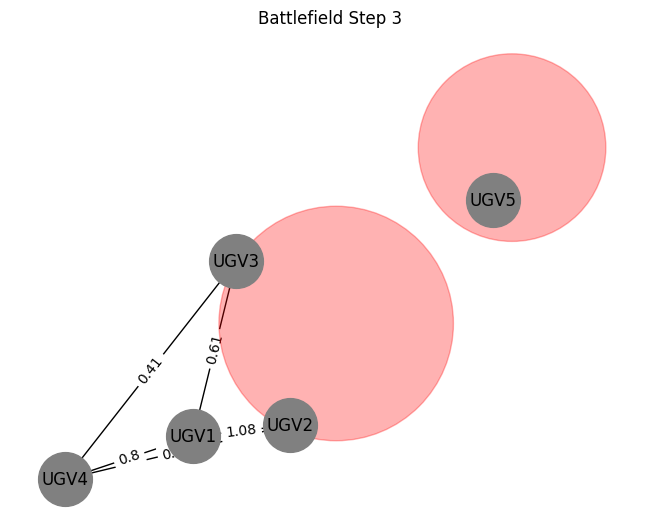

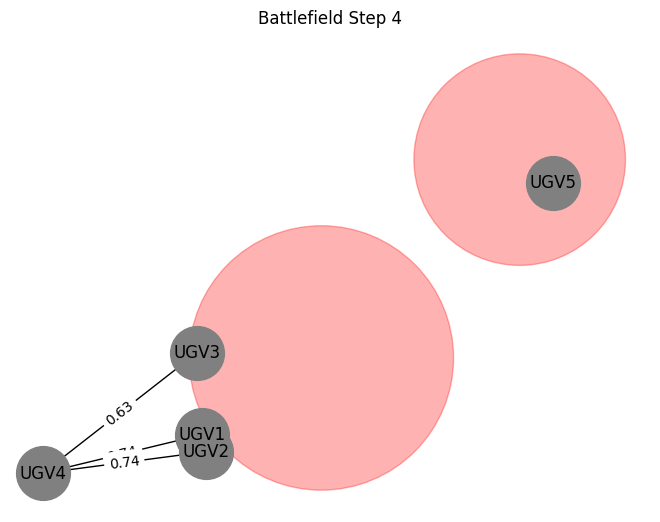

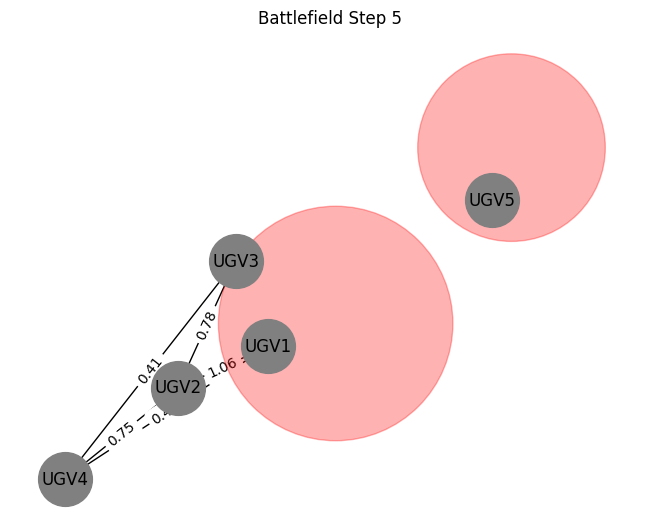

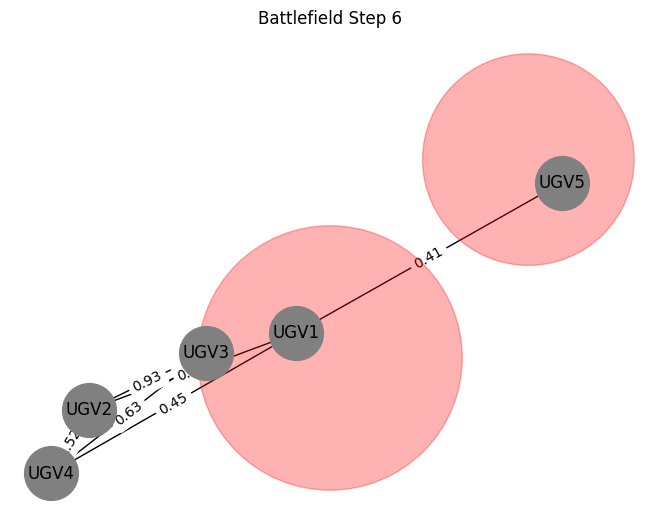

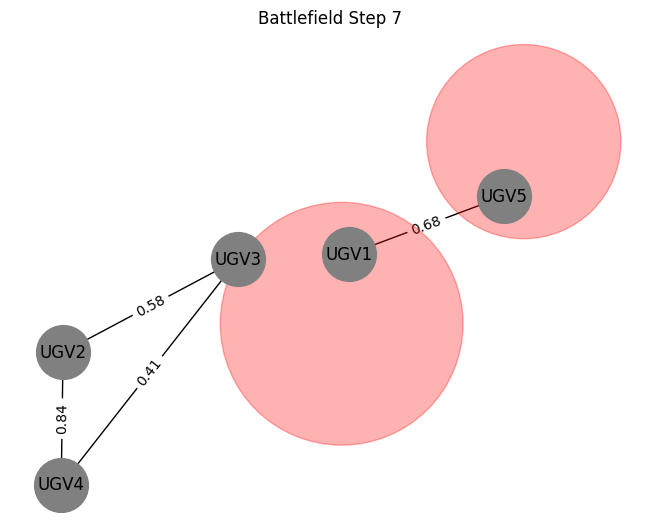

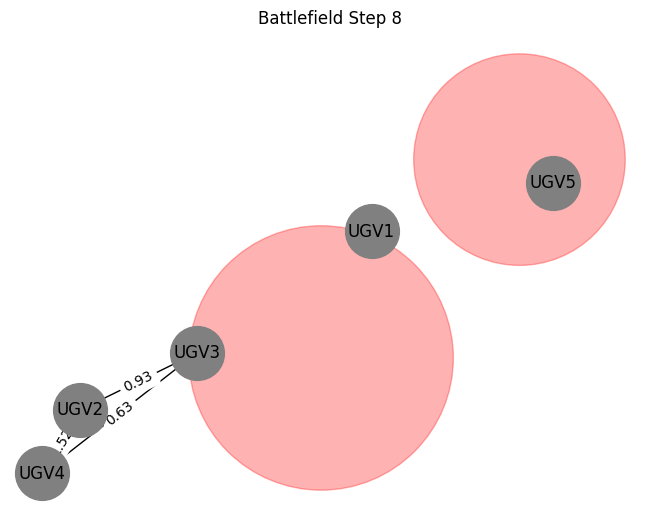

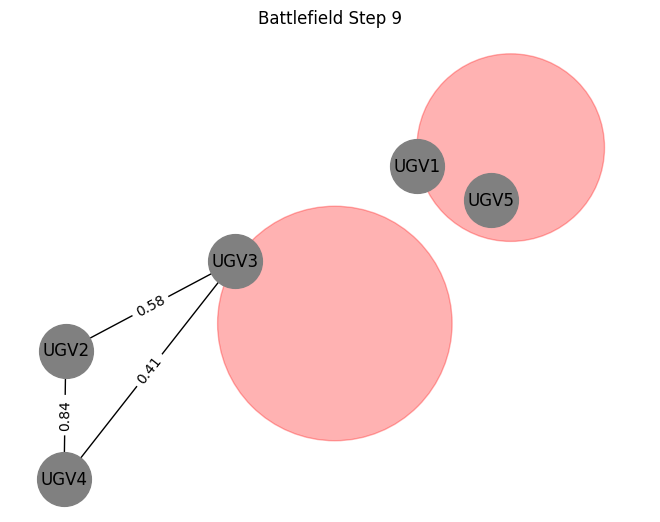

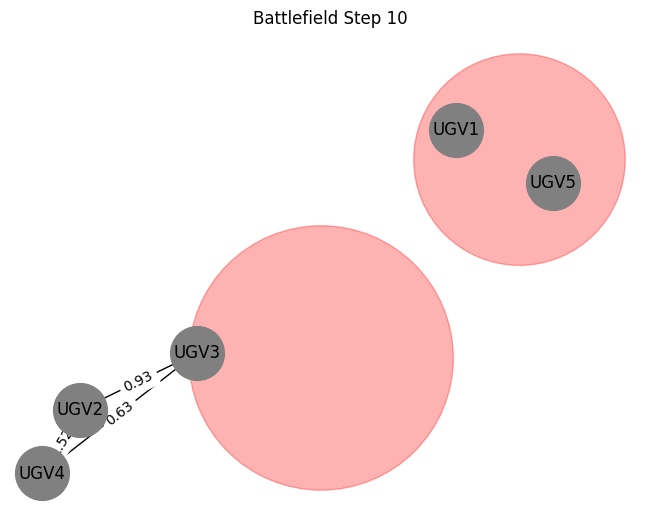

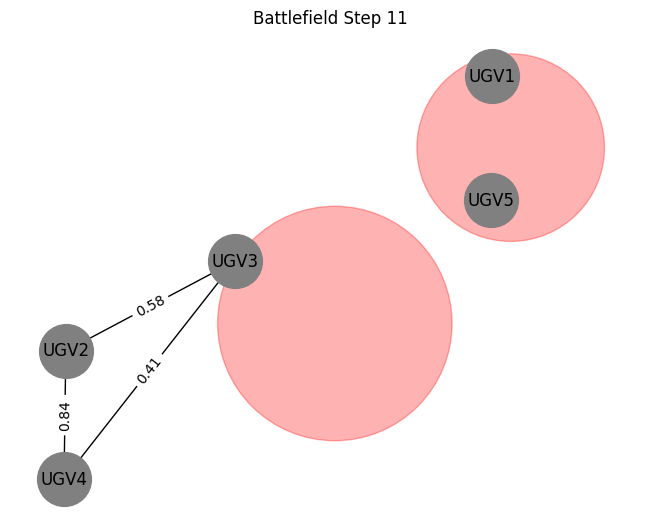

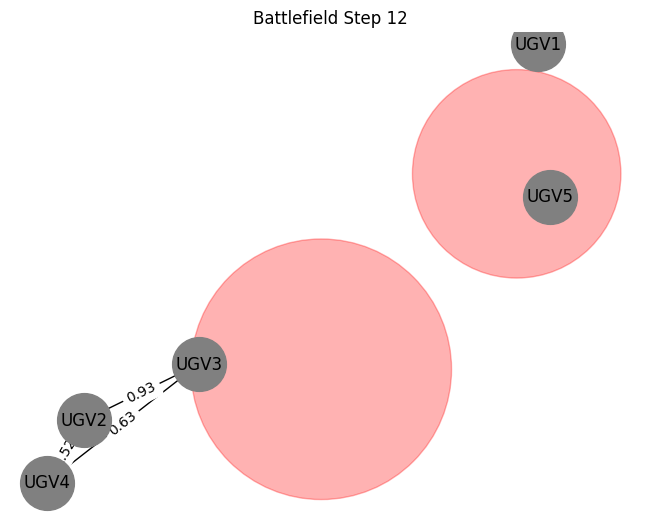

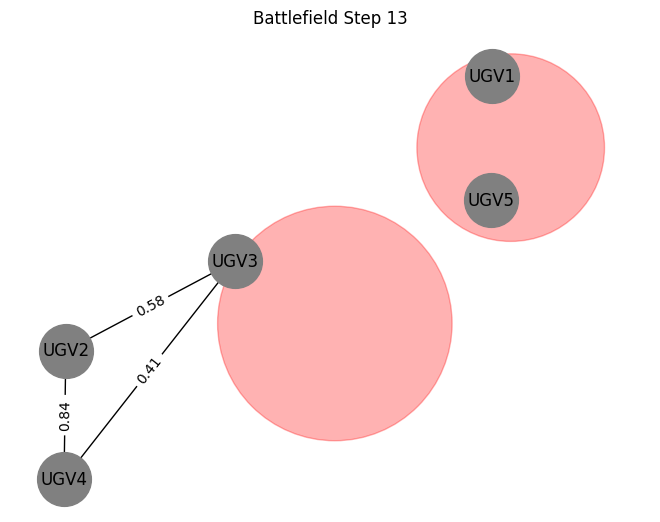

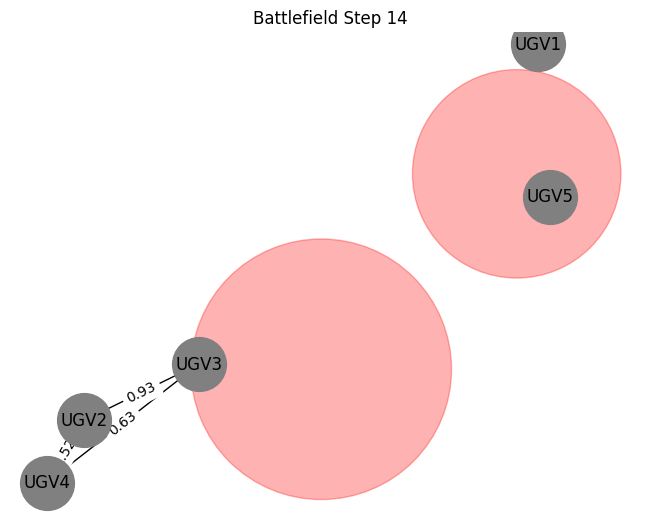

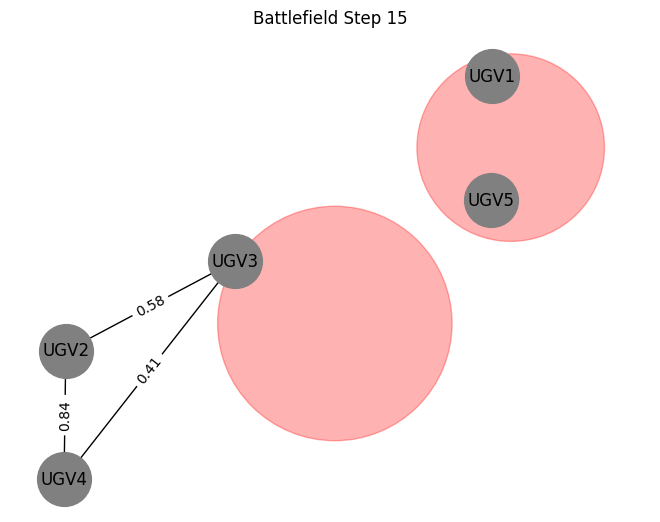

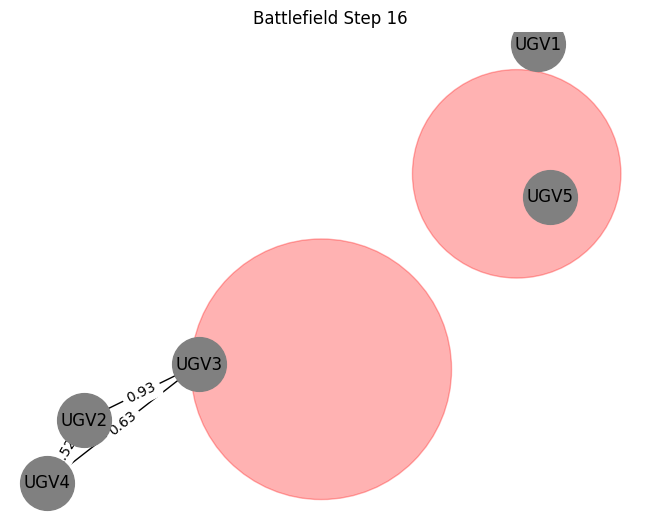

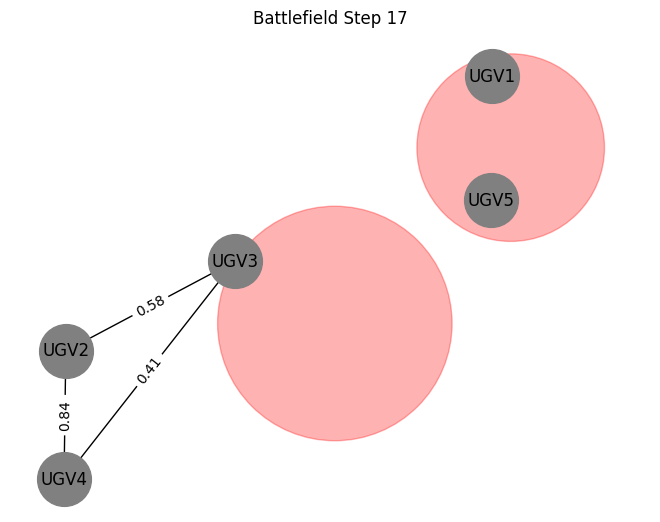

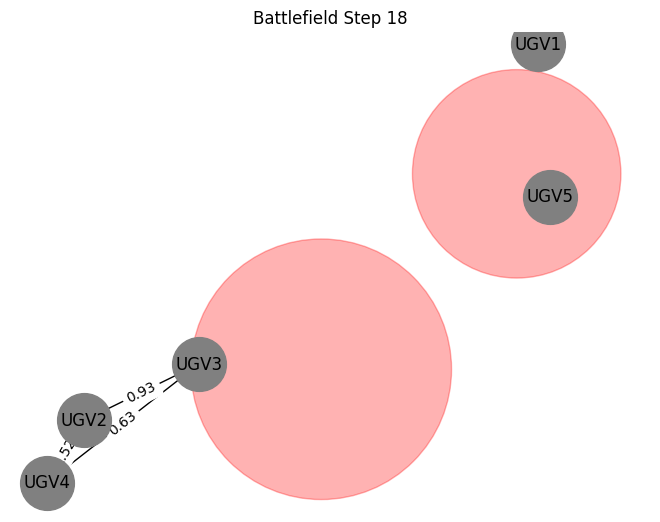

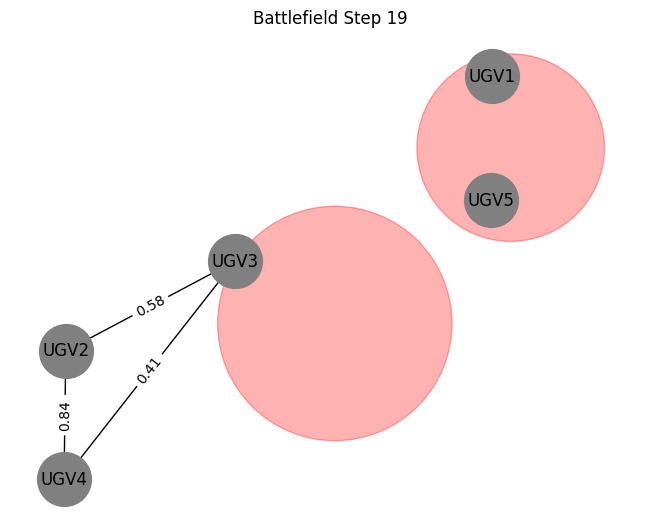

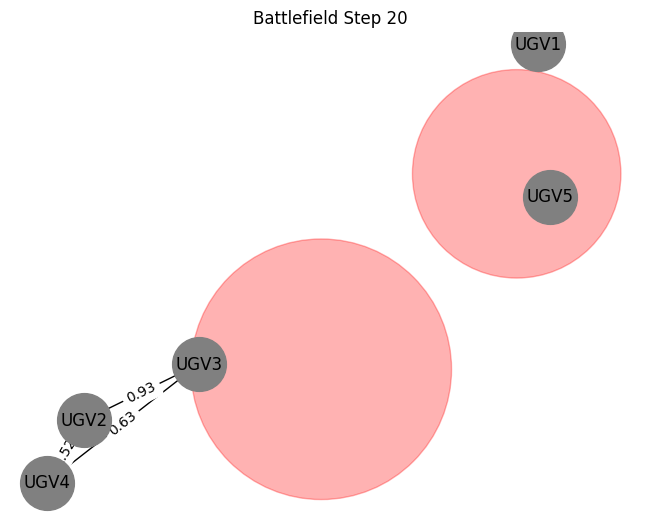

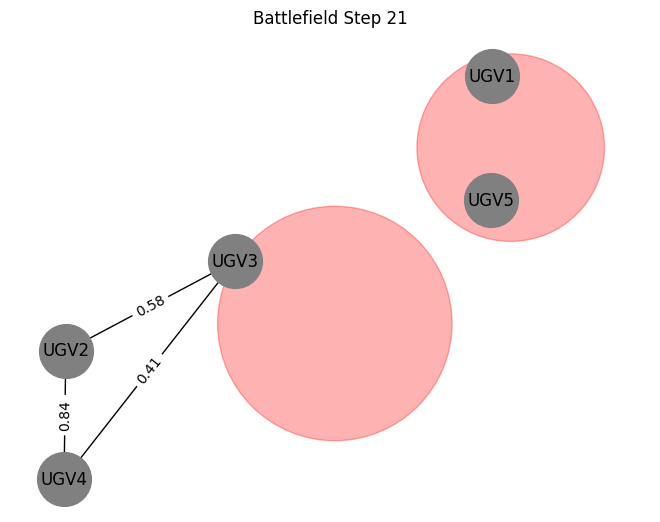

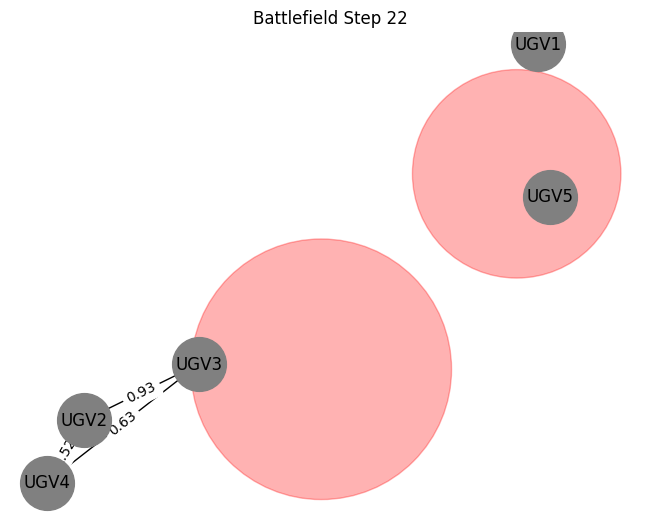

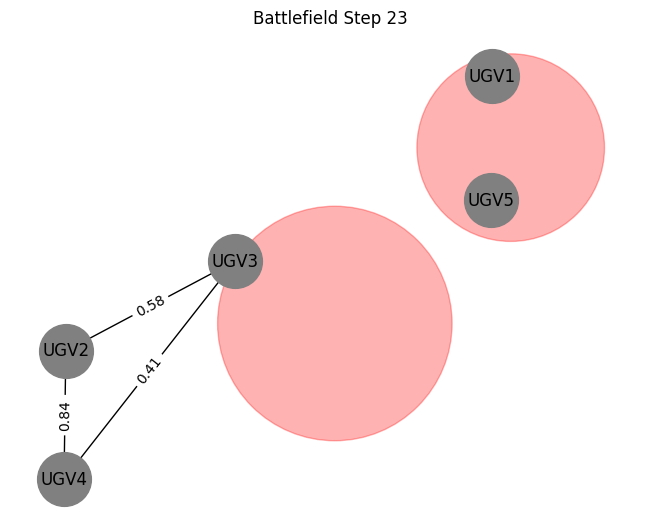

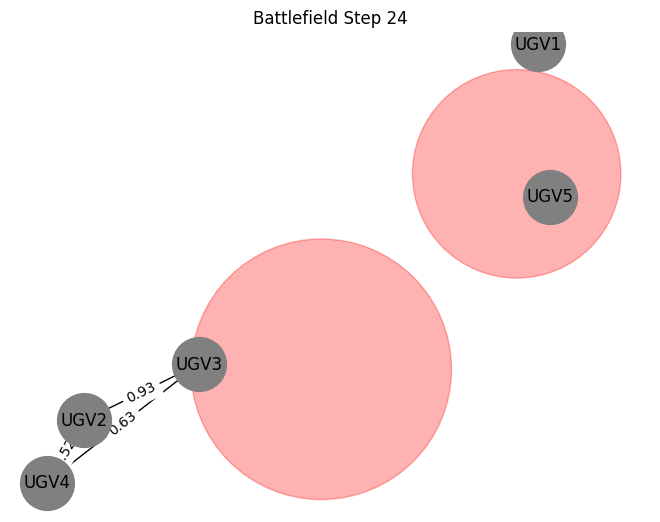

In [28]:
# Define start positions
positions = {
    'UGV1': (0, 0),
    'UGV2': (4, 1),
    'UGV3': (2, 5),
    'UGV4': (1, 3),
    'UGV5': (3, 3)
}

# Define random goal positions
goals = {ugv: (random.uniform(0, 6), random.uniform(0, 6)) for ugv in positions}

# Init graph
G = nx.Graph()
for ugv in positions:
    G.add_node(ugv, pos=positions[ugv])

# Obstacle zones
obstacles = [(2.5, 2.5, 1), (4, 4, 0.8)]

# Start simulation
simulate_battlefield(G, positions, goals, steps=25)


In [29]:
UGV_BASE = (0, 0)  # coordinates for base


In [30]:
returning_home = {ugv: False for ugv in positions}


In [31]:
def move_all_ugvs(positions, goals, returning_home, step_size=0.3):
    for ugv in positions:
        if returning_home[ugv]:
            goal = UGV_BASE
        else:
            goal = goals[ugv]
        current = positions[ugv]
        new_pos = move_toward(current, goal, step_size)
        positions[ugv] = new_pos


In [32]:
# If a UGV has no connections, mark it as returning to base
for ugv in G.nodes:
    if G.degree[ugv] == 0 and not returning_home[ugv]:
        print(f"[RTB] {ugv} lost contact! Returning to base.")
        returning_home[ugv] = True


[RTB] UGV1 lost contact! Returning to base.
[RTB] UGV5 lost contact! Returning to base.


In [33]:
MAX_FUEL = 30  # number of steps before forced return
fuel_levels = {ugv: MAX_FUEL for ugv in positions}

# Random chance some drones are tampered with
tampered = {ugv: random.random() < 0.2 for ugv in positions}  # 20% chance


In [34]:
# ↓ Burn fuel each round
for ugv in fuel_levels:
    fuel_levels[ugv] -= 1
    if fuel_levels[ugv] <= 5 and not returning_home[ugv]:
        print(f"[⛽] {ugv} low on fuel! Returning to base.")
        returning_home[ugv] = True


In [35]:
for ugv in returning_home:
    if returning_home[ugv] and tampered[ugv]:
        print(f"[⚠️ SECURITY] {ugv} tampered! Denying base entry.")
        returning_home[ugv] = False
        goals[ugv] = (random.uniform(0, 6), random.uniform(0, 6))  # wander randomly


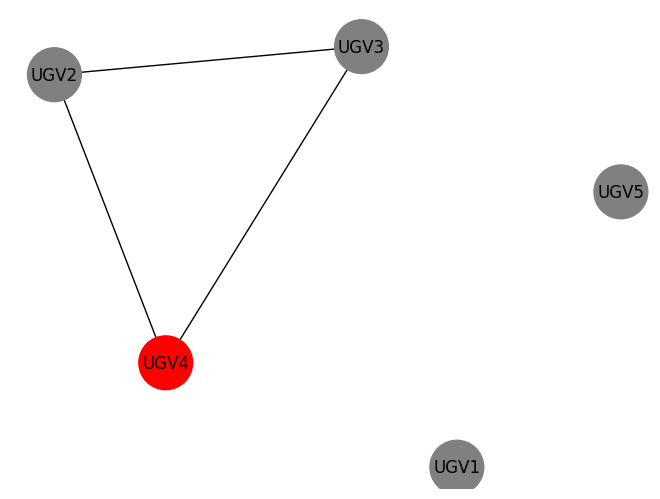

In [36]:
colors = ['red' if tampered[n] else 'grey' for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1500)
